# Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [9]:
import numpy as np
import itertools

In [10]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    indices_of_best_combination = []
    best_profit = 0
    weight_with_best_profit = 0

    """
    Itarate over possible number of items to pack.
    Generate all possible combinations of indices
    for a given number of items.
    Calculate profit and weight.
    If the profit is better than the current best profit
    and the weight is smaller than the capacity of the knapsack,
    then update indices, best profit, and final weight.
    """
    for number_of_items in range(1, len(self.profits) + 1):
      for indices_of_items in itertools.combinations(range(len(self.profits)), number_of_items):
        indices_of_items = list(indices_of_items)
        profit = sum(self.profits[indices_of_items])
        weight = sum(self.weights[indices_of_items])
        if profit > best_profit and weight <= self.capacity:
          indices_of_best_combination = indices_of_items
          best_profit = profit
          weight_with_best_profit = weight
    return(indices_of_best_combination, best_profit, weight_with_best_profit)


  def __create_pw_ratio_and_index_array(self):
    """
    Create array of profit to weight ratio.
    Create array of indices: [0, 1, ... number_of_items - 1].
    Join those two arrays by columns and save the result.
    The result of this operation is an array with 2 columns.
    Sort this array in descending order of the profit to weight column.
    Return the sorted array
    """
    pw_ratio_array = self.profits / self.weights
    indices = np.arange(len(pw_ratio_array))
    pw_ratio_and_index_array = np.c_[pw_ratio_array, indices]
    sorted_pw_ratio_and_index_array = sorted(pw_ratio_and_index_array, key = lambda pw_ratio: -pw_ratio[0])
    return(np.array(sorted_pw_ratio_and_index_array))

  def solve_knapsack_pw_ratio(self):
    """
    Create sorted profit to waight ratio and index array.
    Initialize empty list of indices.
    Initialize profit and weight.
    Iterate over items according to their profit to ther ratio,
    first check items with higest ratios.
    If the capacity left is big enough for the item, add it to the knapsack.
    Else try the next item.
    """
    pw_ratio_and_index_array = self.__create_pw_ratio_and_index_array()
    indices = []
    profit = 0
    weight = 0
    for index in pw_ratio_and_index_array[:, 1]:
      index = int(index)
      if weight + self.weights[index] <= self.capacity:
        indices.append(index)
        profit = profit + self.profits[index]
        weight = weight + self.weights[index]

    return(indices, profit, weight)

In [11]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])
t1 = KnapSack(profits, weights, capacity)
bf_result = t1.solve_knapsack_brute_force()
print(f"Brute Force:\n Indices: {bf_result[0]} Value of profits: {bf_result[1]} Value of weights: {bf_result[2]}\n")

pw_result = t1.solve_knapsack_pw_ratio()
print(f"PW Ratio:\n Indices: {pw_result[0]} Value of profits: {pw_result[1]} Value of weights: {pw_result[2]}")

Brute Force:
 Indices: [1, 2] Value of profits: 17 Value of weights: 8

PW Ratio:
 Indices: [3, 1] Value of profits: 14 Value of weights: 5


### Tests

In [12]:
t1_profits = np.array([4, 9, 6, 5])
t1_weights = np.array([2, 4, 3, 3])
t1_capacity = 5
t1_knapsac = KnapSack(t1_profits, t1_weights, t1_capacity)
t1_bf_result = t1_knapsac.solve_knapsack_brute_force()
t1_pw_result = t1_knapsac.solve_knapsack_pw_ratio()

assert t1_bf_result == ([0, 2], 10, 5)
assert t1_pw_result == ([1], 9, 4)

t2_profits = np.array([1, 3, 5])
t2_weights = np.array([1, 2, 3])
t2_capacity = 4
t2_knapsac = KnapSack(t2_profits, t2_weights, t2_capacity)
t2_bf_result = t2_knapsac.solve_knapsack_brute_force()
t2_pw_result = t2_knapsac.solve_knapsack_pw_ratio()

assert t2_bf_result == ([0, 2], 6, 4)
assert t2_pw_result == ([2, 0], 6, 4)

t3_profits = np.array([3, 2, 1, 2, 3, 1])
t3_weights = np.array([10, 12, 16, 17, 18, 5])
t3_capacity = 22
t3_knapsac = KnapSack(t3_profits, t3_weights, t3_capacity)
t3_bf_result = t3_knapsac.solve_knapsack_brute_force()
t3_pw_result = t3_knapsac.solve_knapsack_pw_ratio()

assert t3_bf_result == ([0, 1], 5, 22)
assert t3_pw_result == ([0, 5], 4, 15)


In [13]:
import time
import matplotlib.pyplot as plt

In [14]:
def get_average_times_of_bf_solve(n, max_number_of_items):
  """
  Calculate the average of running brute force solve n times.
  For numbers from 1 to max_number_of_items
  check how long it takes the brute force method to run.
  Sum the running times for each number of items and return the average
  """
  sum_times = np.zeros(max_number_of_items)
  weights = np.ones(max_number_of_items)
  profits = np.ones(max_number_of_items)
  capacity = max_number_of_items

  for _ in range(n):
    running_times = np.zeros(max_number_of_items)
    for n in range(max_number_of_items):
      t1 = KnapSack(profits[:n+1], weights[:n+1], capacity)
      start_time = time.time()
      t1.solve_knapsack_brute_force()
      end_time = time.time()
      running_times[n] = end_time - start_time
    sum_times = sum_times + running_times
  average_times = sum_times / n
  return(average_times)

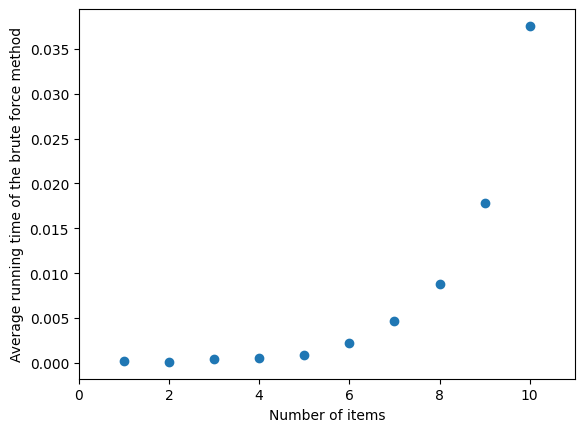

In [15]:
max_number_of_items = 10
average_times = get_average_times_of_bf_solve(50, max_number_of_items)
plt.scatter(range(1, max_number_of_items + 1), average_times)
plt.axis(xmin = 0, xmax = max_number_of_items + 1)
plt.xlabel("Number of items")
plt.ylabel("Average running time of the brute force method")
plt.show()

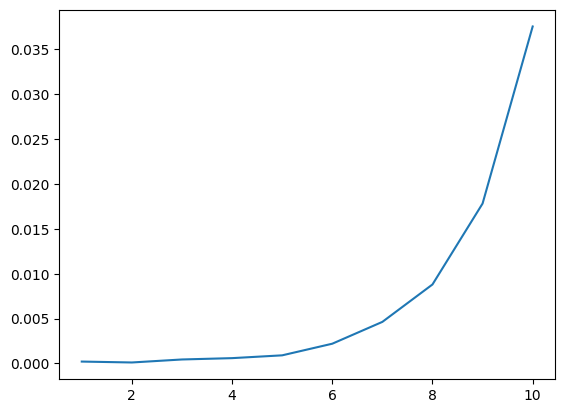

In [16]:
plt.plot(range(1, max_number_of_items + 1), average_times)
plt.show()

### Wnioski

Te dwie metody niekoniecznie dają taki sam rezultat. Metoda brute force wybiera zawsze optymalny zestaw przedmiotów, jednak jest bardziej czasochłonna niż metoda zabierania przedmitów o najlepszym stosunku wartości do masy. Zadana metoda heurystyczna zwraca najelpszy zestaw przedmitów tylko w optymistycznych przypadkach. Zatem można stwierdzić, że strategia, polegająca na pakowaniu przedmitów o największym stosunku wartości do masy, nie jest optymalna, jeżeli chodzi o wybór przedmiotów. Jest ona jednak stosunkowo prosta w implementacji, a także posiada lepszą złożoność obliczeniową niż metoda brute force.